In [1]:
from tensorboardX import SummaryWriter
import pandas as pd
import numpy as np
import torch
import japanize_matplotlib

In [42]:
# !pip install -U sentence-transformers

In [2]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2022年を含む意見の可視化

In [11]:
op = ["I agree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I rather agree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I rather disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.", 
"I disagree with the idea that 'husbands should work outside the home and wives should take care of the home'."]

In [12]:
gend = model.encode(op)

writer = SummaryWriter()
weights = gend

# weights = weights[:500]
labels = op

writer.add_embedding(torch.FloatTensor(weights), metadata=labels)

### 主成分分析
https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354

In [13]:
weights.shape

(4, 384)

In [14]:
vec = weights.tolist()
print(len(vec[0]), len(vec))

384 4


In [15]:
import pandas as pd

df1 = pd.DataFrame(op, columns=['sentence'])
df1

,sentence
0,I agree with the idea that 'husbands should wo...
1,I rather agree with the idea that 'husbands sh...
2,I rather disagree with the idea that 'husbands...
3,I disagree with the idea that 'husbands should...


In [17]:
df = pd.DataFrame((vec[i] for i in range(0, 4)), index=df1)
df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
"(I agree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.027554,0.039380,0.027832,-0.037115,0.021701,0.017040,0.080843,-0.093988,-0.143284,-0.018548,...,0.099616,-0.065479,0.017474,-0.058809,-0.050389,0.019873,-0.000510,0.070249,0.008544,0.063030
"(I rather agree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.020657,0.048408,0.019616,-0.035483,0.038134,-0.005517,0.047715,-0.083218,-0.103717,-0.012229,...,0.109128,-0.058331,-0.004003,-0.072889,-0.051409,0.026802,0.010214,0.056063,0.003143,0.057876
"(I rather disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.008303,0.039548,0.011782,-0.029389,0.029074,-0.014805,0.034313,-0.089611,-0.101908,-0.007050,...,0.103397,-0.054568,-0.008702,-0.087694,-0.055161,0.015066,0.011247,0.060177,0.016067,0.064142
"(I disagree with the idea that 'husbands should work outside the home and wives should take care of the home'.,)",-0.008475,0.036140,0.027747,-0.022028,0.013961,-0.012958,0.069456,-0.111053,-0.135607,-0.015679,...,0.092088,-0.063725,0.004274,-0.074143,-0.055228,-0.000729,0.007074,0.067364,0.012397,0.069519


In [18]:
#Computing the correlation matrix
X_corr = df.corr()

#Computing eigen values and eigen vectors
values,vectors = np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors = vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X = np.real(np.dot(vec, new_vectors))
neww_X

array([[ 0.12740589, -0.00942899],
       [ 0.0113432 , -0.15600931],
       [-0.14667824, -0.07633905],
       [-0.08955226,  0.06625888]])

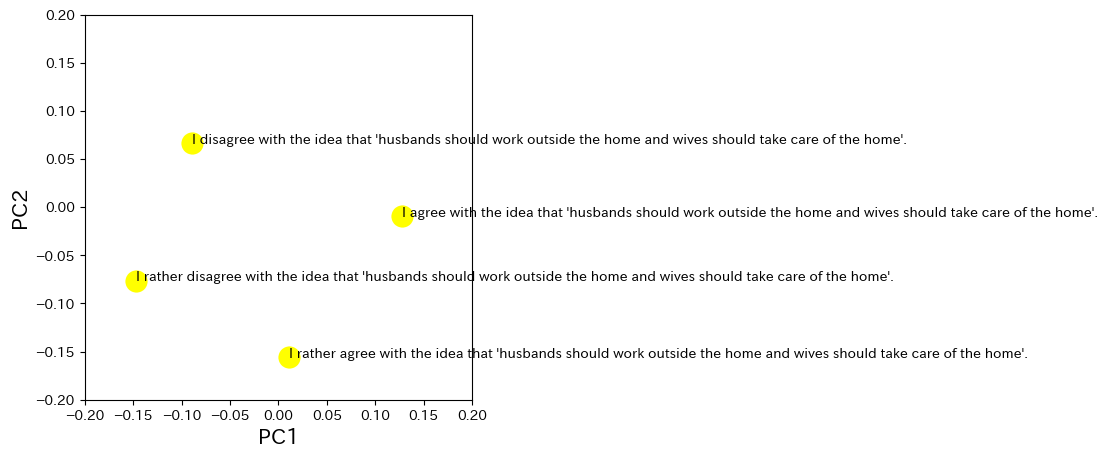

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='yellow')
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
# plt.title("Word Embedding Space",size=20)
vocab=op
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

#### 寄与率計算
https://qiita.com/nmmg0031785/items/0ab3f8cdf22f5f0ea273

In [21]:
# 共分散行列(covariance matrix)
covmatrix = np.cov(weights.T)

# 固有値, 固有ベクトルを求める
eig = np.linalg.eig(covmatrix)[0]
eigvec = np.linalg.eig(covmatrix)[1]

# 昇順に並べ替え
idx = np.argsort(eig)[::-1]
eig = eig[idx]
eigvec = eigvec[idx]

# 主成分得点
pcacor = np.dot(weights, eigvec)

# 寄与率
cr = eig/sum(eig)

C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


Text(0, 0.5, 'cumulative contribution rate')

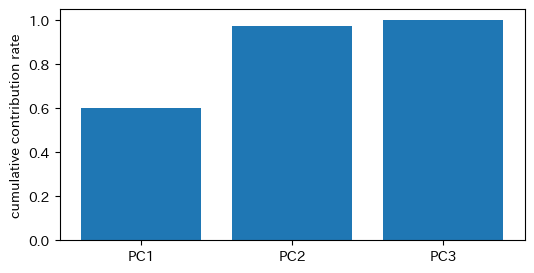

In [22]:
import matplotlib.pyplot as plt

## 累積寄与率をプロット
ccr = np.cumsum(cr)[:3]
lb = ["PC{}".format(i+1) for i in range(3)]

fig = plt.figure(figsize=(6,3)) #,dpi=320)
ax = fig.add_subplot(111)
ax.bar(lb, ccr, label="累積寄与率")
plt.ylabel("cumulative contribution rate")
# plt.savefig('contri_rate.png')

C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:692: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(self.convert_xunits(self._x))
C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.py:693: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))
C:\Users\so030\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\text.

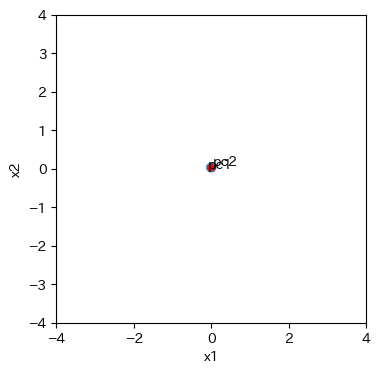

In [23]:
# データ中心と主成分軸を計算
ave = np.mean(weights, axis=0)
dpt = ave + eigvec

# プロット
fig = plt.figure(figsize=(4,4)) #,dpi=320)
ax = fig.add_subplot(111)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("x1")
plt.ylabel("x2")

ax.scatter(weights[:,0], weights[:,1], alpha=0.4)
ax.scatter(ave[0], ave[1], marker="*", color="red")
for i in range(2):
    ax.plot([ave[0], dpt[0,i]], [ave[1], dpt[1,i]],
            color="red", linewidth=1)
    ax.text(dpt[0,i], dpt[1,i], "pc{}".format(i+1))

#### sklearnによる確かめ
https://chokkan.github.io/mlnote/unsupervised/03pca.html#id7

##### 再現バージョン

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = weights
pca.fit(X)

PCA(n_components=2)

In [57]:
pca.components_

array([[-1.61703043e-02, -5.67248799e-02, -1.66683123e-02,
         2.77544539e-02,  1.09961228e-02,  4.83479686e-02,
         5.55416793e-02,  1.06868017e-02,  7.48464391e-02,
         1.10712266e-02,  4.10480872e-02, -9.85708088e-02,
        -5.21468604e-03, -2.85751913e-02, -3.30952257e-02,
        -6.56566247e-02, -6.16695778e-03, -9.92673170e-03,
        -5.88425435e-02,  2.01849104e-03,  3.65952328e-02,
        -2.77115311e-02, -3.89885856e-03, -3.52013856e-03,
         4.42293435e-02,  3.24954540e-02, -5.51166199e-02,
         7.33679608e-02,  4.40898873e-02, -1.12135783e-01,
        -7.40748867e-02,  9.27401707e-03, -2.04293616e-02,
        -9.24879313e-03, -3.95892896e-02,  2.07695980e-02,
         6.69571385e-02, -5.65545522e-02,  3.52793513e-03,
         4.95639816e-02,  7.12391164e-04, -7.03834742e-02,
        -3.59194688e-02,  2.31707115e-02,  3.34917642e-02,
        -7.27660581e-03, -2.08716840e-02,  1.00160077e-01,
         2.65549980e-02, -3.40550281e-02, -2.59851888e-0

In [58]:
pca.singular_values_ ** 2

array([1.523029  , 0.05495575], dtype=float32)

In [59]:
new = pca.transform(X)
new

array([[-0.26325727,  0.16821758],
       [-0.28362614,  0.04722245],
       [-0.2856641 , -0.13536549],
       [-0.27115232, -0.07810844],
       [ 1.1036998 , -0.00196614]], dtype=float32)

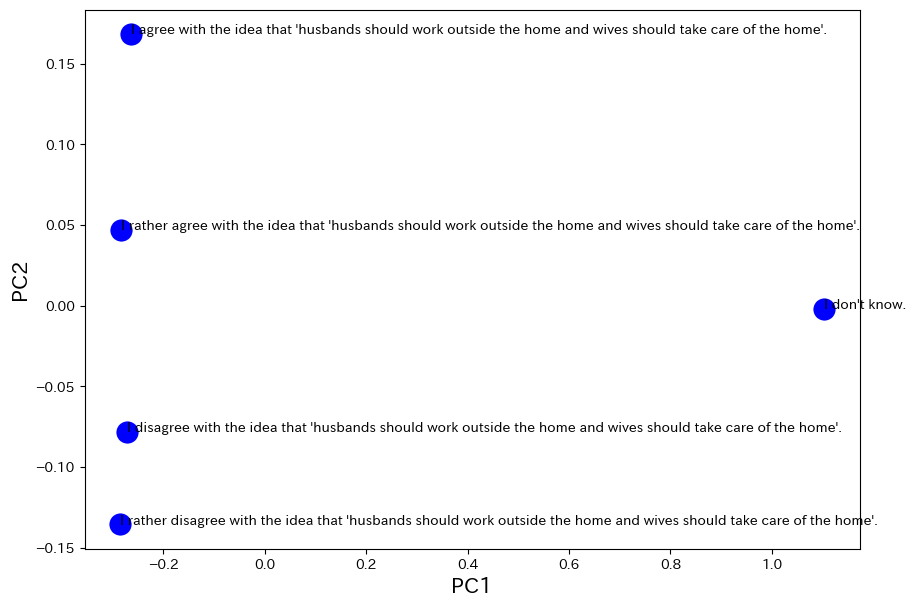

In [60]:
# sklearn ver
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(new[:,0],new[:,1], linewidths=10, color='blue')
# plt.xlim(-0.25, 0.25)
# plt.ylim(-0.25, 0.25)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
# plt.title("Word Embedding Space",size=20)
vocab=op
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(new[i,0],new[i,1]))

### データの読み込み

In [24]:
data = pd.read_excel("domestic_updated.xlsx")
data

,調査,賛成,どちらかといえば賛成,どちらかといえば反対,反対,わからない
0,1979年5月調査,29.1,41.0,18.3,4.5,7.1
1,1992年11月調査,19.8,35.8,26.4,11.9,6.1
2,1997年9月調査,17.9,34.0,26.9,16.7,4.6
3,2002年7月調査,12.8,30.5,29.4,21.7,5.6
4,2004年11月調査,11.0,30.2,29.5,24.2,5.0
5,2007年8月調査,12.0,27.8,30.7,26.2,3.2
6,2009年10月調査,9.5,27.8,32.0,26.6,4.0
7,2012年10月調査,12.4,36.0,30.4,18.4,2.8
8,2014年8月調査,11.2,32.0,34.2,17.4,5.1
9,2016年9月調査,8.3,28.7,37.0,21.5,4.5


In [62]:
# data = pd.read_excel("domestic_.xlsx")
# data

In [25]:
data.iloc[0, 1:]

賛成            29.1
どちらかといえば賛成    41.0
どちらかといえば反対    18.3
反対             4.5
わからない          7.1
Name: 0, dtype: object

In [26]:
year1979 = pd.DataFrame({data.iloc[0, 0] : data.iloc[0, 1:]})
year1979['pot'] = -np.log(year1979['1979年5月調査'].astype(np.float64)/100)
# type(np.log(year1979.iloc[0,0]/100))
year1979

,1979年5月調査,pot
賛成,29.1,1.234432
どちらかといえば賛成,41.0,0.891598
どちらかといえば反対,18.3,1.698269
反対,4.5,3.101093
わからない,7.1,2.645075


##### 1979年のみ

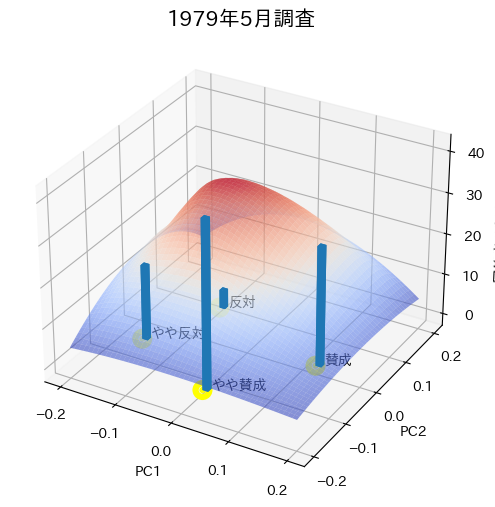

In [29]:
# griddata調べ

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm

# set up the figure and axes
fig = plt.figure(figsize=(6, 6)) #, dpi=220)
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(neww_X[:,0],neww_X[:,1], [0,0,0,0], linewidths=10,color='yellow')
# ax2.xlim(-0.25, 0.25)
# ax2.ylim(-0.25, 0.25)
# ax2.xlabel("PC1",size=15)
# ax2.ylabel("PC2",size=15)

jp = ['賛成', 'やや賛成', 'やや反対', '反対']
for i, word in enumerate(jp):
  ax2.text(neww_X[i,0]+0.01, neww_X[i,1]+0.01, 0, word, zdir=None)

# bar graph code
x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 0.01
depth = 0.01
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

## surface plot code
# border condition
dum = [-0.2, 0.2, -0.2, 0.2]
dumy = [-0.2, 0.2, 0.2, -0.2]

xx = neww_X[:,0].tolist()
yy = neww_X[:,1].tolist()

for l in range(len(dum)):
    xx.append(dum[l]) 
    yy.append(dumy[l])

zz = 10*year1979.iloc[:-1, 1]
zz = zz.to_list()
for m in range(len(dum)):
    zz.append(-np.log(1/100))
    
X, Y, Z = xx, yy, zz

points = np.array([X, Y]).T

# # create a grid of coordinates between the minimum and
# # maximum of your X and Y. 50j indicates 50 discretization
# # points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
# # interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True, alpha=.6)

# ax2.view_init(elev= 25, azim=15, roll=0)

plt.xticks([-0.2, -0.1, 0, 0.1, 0.2])
plt.yticks([-0.2, -0.1, 0, 0.1, 0.2])

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel("\n回答者の割合 (%), \nポテンシャル*10")
ax2.set_title("1979年5月調査",size=15)

plt.savefig("domestic_pot_1979.png")
plt.show()

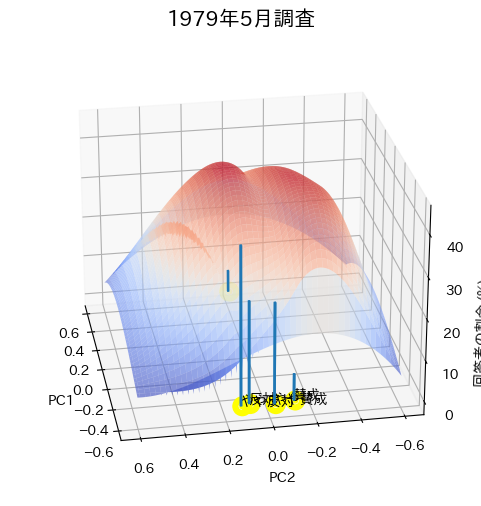

### まとめて可視化

In [30]:
data

,調査,賛成,どちらかといえば賛成,どちらかといえば反対,反対,わからない
0,1979年5月調査,29.1,41.0,18.3,4.5,7.1
1,1992年11月調査,19.8,35.8,26.4,11.9,6.1
2,1997年9月調査,17.9,34.0,26.9,16.7,4.6
3,2002年7月調査,12.8,30.5,29.4,21.7,5.6
4,2004年11月調査,11.0,30.2,29.5,24.2,5.0
5,2007年8月調査,12.0,27.8,30.7,26.2,3.2
6,2009年10月調査,9.5,27.8,32.0,26.6,4.0
7,2012年10月調査,12.4,36.0,30.4,18.4,2.8
8,2014年8月調査,11.2,32.0,34.2,17.4,5.1
9,2016年9月調査,8.3,28.7,37.0,21.5,4.5


In [31]:
year1979 = pd.DataFrame({data.iloc[1, 0] : data.iloc[1, 1:]})
year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)
# type(np.log(year1979.iloc[0,0]/100))
year1979

,1992年11月調査,pot
賛成,19.8,1.619488
どちらかといえば賛成,35.8,1.027222
どちらかといえば反対,26.4,1.331806
反対,11.9,2.128632
わからない,6.1,2.796881


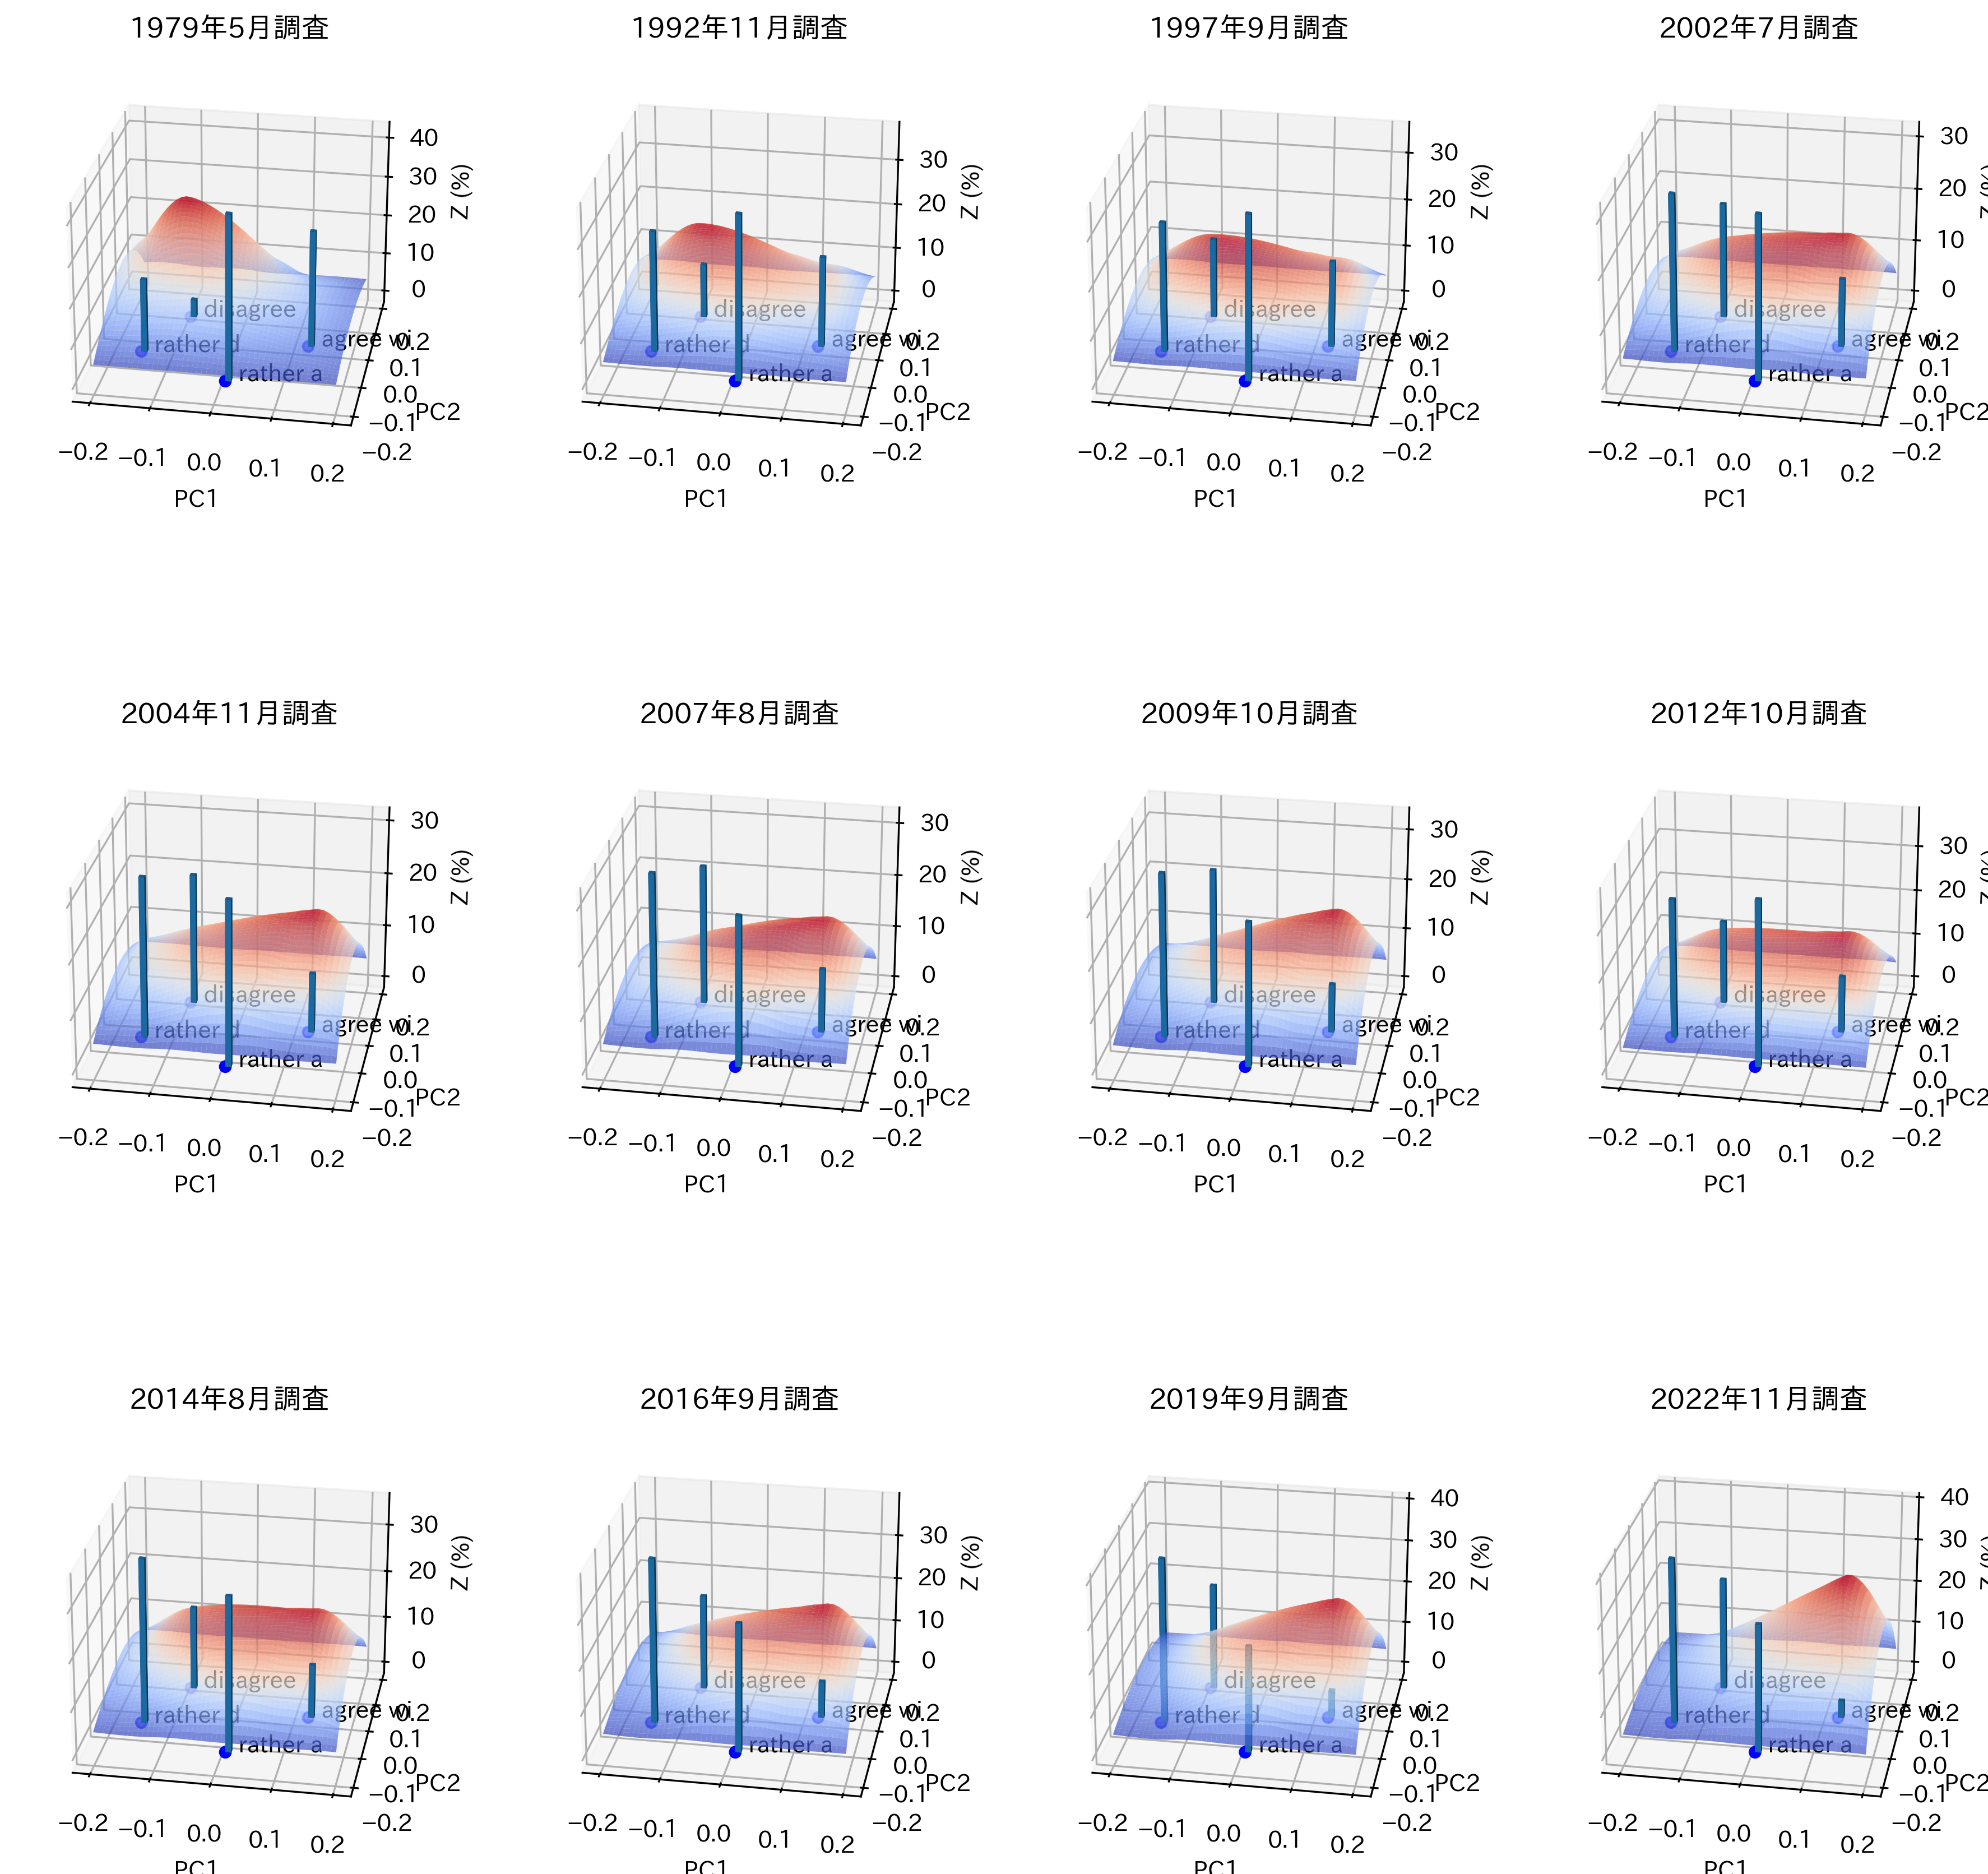

In [34]:
fig, axes = plt.subplots(3, 4, figsize=(15,15), dpi=300, subplot_kw={'projection': '3d'})

h = 0

for i in range(3):
    for j in range(4):

        axes[i][j].scatter(neww_X[:,0], neww_X[:,1], [0,0,0,0], linewidths=1,color='blue')
        vocab=op
        for k, word in enumerate(vocab):
            axes[i][j].text(neww_X[k,0], neww_X[k,1], 0, word[:10], zdir=None)

        # calculate potential
        year1979 = pd.DataFrame({data.iloc[h, 0] : data.iloc[h, 1:]})
        year1979['pot'] = -np.log(year1979.iloc[:, 0].astype(np.float64)/100)

        # bar graph code
        x, y, z = neww_X[:,0], neww_X[:,1], year1979.iloc[:-1, 0].astype(np.float64).tolist()
        
        top = z
        bottom = np.zeros_like(top)
        width = 0.01
        depth = 0.01
        axes[i][j].bar3d(x, y, bottom, width, depth, top, shade=True)
        axes[i][j].set_title(data.iloc[h, 0])
        h += 1

        # # surface plot code

        dum = [-0.2, -0.1, 0, 0.1, 0.2, -0.2, -0.1, 0, 0.1, 0.2]
        dumy = [0.2, 0.2, 0.2, 0.2, 0.2, -0.2, -0.2, -0.2, -0.2, -0.2]

        xx = neww_X[:,0].tolist()
        yy = neww_X[:,1].tolist()

        for l in range(len(dum)):
            xx.append(dum[l]) 
            yy.append(dumy[l])

        zz = 10*year1979.iloc[:-1, 1]
        zz = zz.to_list()
        for m in range(len(dum)):
            zz.append(-np.log(1/100))
        
        X, Y, Z = xx, yy, zz

        points = np.array([X, Y]).T

        # # create a grid of coordinates between the minimum and
        # # maximum of your X and Y. 50j indicates 50 discretization
        # # points between the minimum and maximum.
        X_grid, Y_grid = np.mgrid[-0.2:0.2:50j, -0.2:0.2:50j]
        # # interpolate your values on the grid defined above
        Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

        axes[i][j].plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                            linewidth=0, antialiased=True, alpha=.7)

        # axes[i][j].set_ylim(-0.5, 0.5)

        axes[i][j].view_init(elev= 25, azim=280, roll=0)

        axes[i][j].set_xlabel("PC1")
        axes[i][j].set_ylabel("PC2")
        axes[i][j].set_zlabel("Z (%)")

        if h == 12:
            break

plt.savefig("domestic_pot_all_updated.png")